<a href="https://colab.research.google.com/github/FatemaTabassum/Data-Science-Projects/blob/main/Stroke_Prediction_Kaggle_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset link is below

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score


# import classifiers
from scipy.sparse.construct import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# import LGBMClassifier
from lightgbm import LGBMClassifier

# import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

#import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

#import KMeans cluster
from sklearn.cluster import KMeans

# Import
from sklearn.ensemble import RandomForestClassifier
sns.set_style("whitegrid")
# pal = sns.color_palette("YlOrBr", as_cmap=True)
# sns.set_palette(pal)
pal1 = sns.color_palette("icefire")
sns.set_palette(pal1)

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
from keras import regularizers

# Load Data

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


0    4861
1     249
Name: stroke, dtype: int64


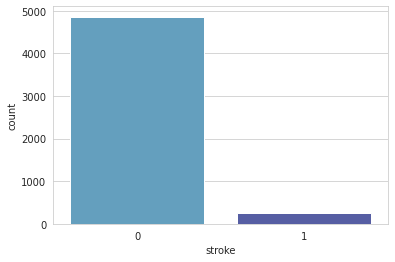

In [ ]:
sns.countplot(data=df, x='stroke');
print(df.stroke.value_counts())

In [ ]:
# We have categorical/nominal features - gender, ever_married, work_type, Residence_type, smoking_status
# We have numerical features - id, age, hypertension, hear_disease, avg_glucose_level, bmi, stroke

#Let's have a the basic idea about each feature in the dataset

#print data type of each features
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [ ]:
# Describe columns of the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110.0,NaN,NaN,NaN,36517.829354,21161.721625,67.0,17741.25,36932.0,54682.0,72940.0
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,NaN,NaN,NaN,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# check if there are null values in any of the columns.

df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


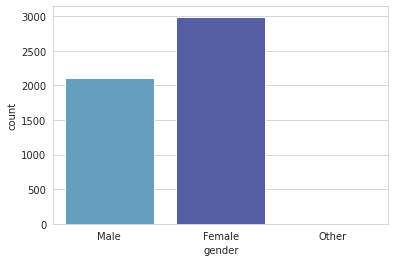

In [ ]:
sns.countplot(x="gender",data=df)
# Female samples are more that male

"\nAlmost all patients who have got stroke are above 50 years of age. \nBut some are below 40, exceptionally 3 patients are below 20.\nPatients who got stroke were either with low glucose level or high glucose \nlevel but low glucose level patients have more probability of getting stroke.\nMostly stroke patients have 'bmi' in range of 20-40.\nAvg glucose level around 150 seems an ideal level for not getting into stroke. All the patiens\n who got into stroke seems to be in the bmi range (20 - 50)\n"

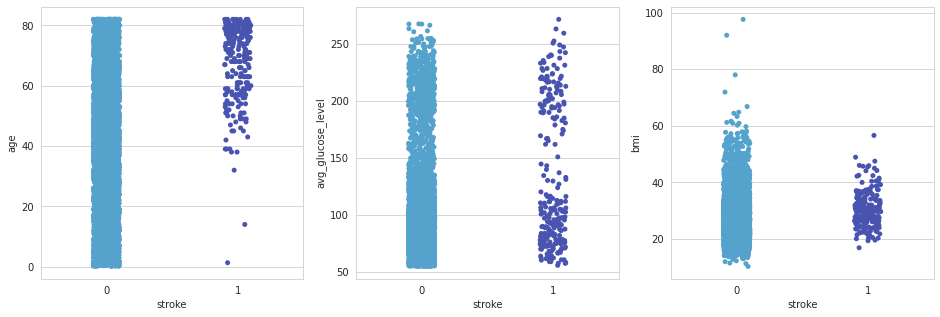

In [ ]:
num_cols = ['age','avg_glucose_level','bmi']
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.stripplot(data=df, x='stroke',y='age')
plt.subplot(1, 3,2)
sns.stripplot(data=df, x='stroke',y='avg_glucose_level')
plt.subplot(1, 3,3)
sns.stripplot(data=df, x='stroke',y='bmi')

'''
Almost all patients who have got stroke are above 50 years of age.
But some are below 40, exceptionally 3 patients are below 20.
Patients who got stroke were either with low glucose level or high glucose
level but low glucose level patients have more probability of getting stroke.
Mostly stroke patients have 'bmi' in range of 20-40.
Avg glucose level around 150 seems an ideal level for not getting into stroke. All the patiens
 who got into stroke seems to be in the bmi range (20 - 50)
'''

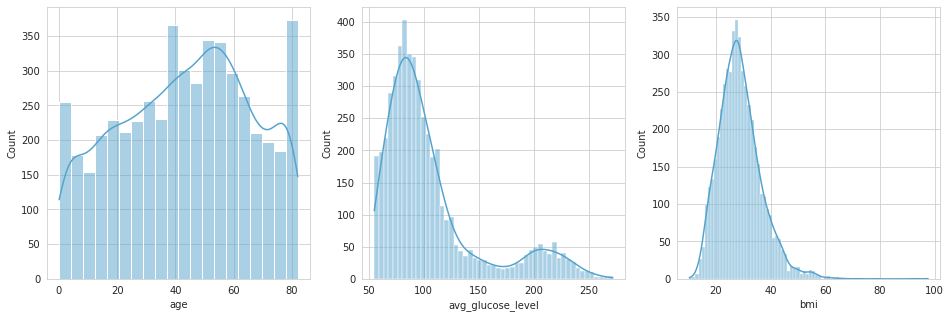

In [ ]:
#distribution of numerical columns

num_cols = ['age','avg_glucose_level','bmi']
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.histplot(data=df,x='age',kde=True)
plt.subplot(1, 3,2)
sns.histplot(data=df,x='avg_glucose_level',kde=True)
plt.subplot(1, 3,3)
sns.histplot(data=df,x='bmi',kde=True)

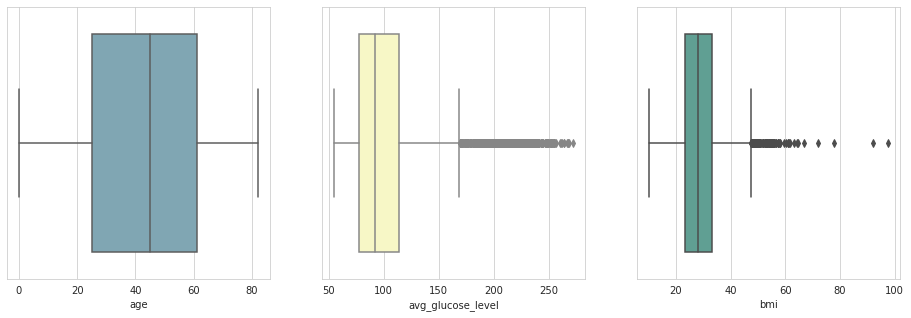

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.boxplot(x=df['age'],palette="blend:#7AB,#EDA")
plt.subplot(1, 3,2)
sns.boxplot(x=df['avg_glucose_level'],palette="Spectral")
plt.subplot(1, 3,3)
sns.boxplot(x=df['bmi'],palette="dark:#5A9_r")

# Conclusion - bmi has some outliers

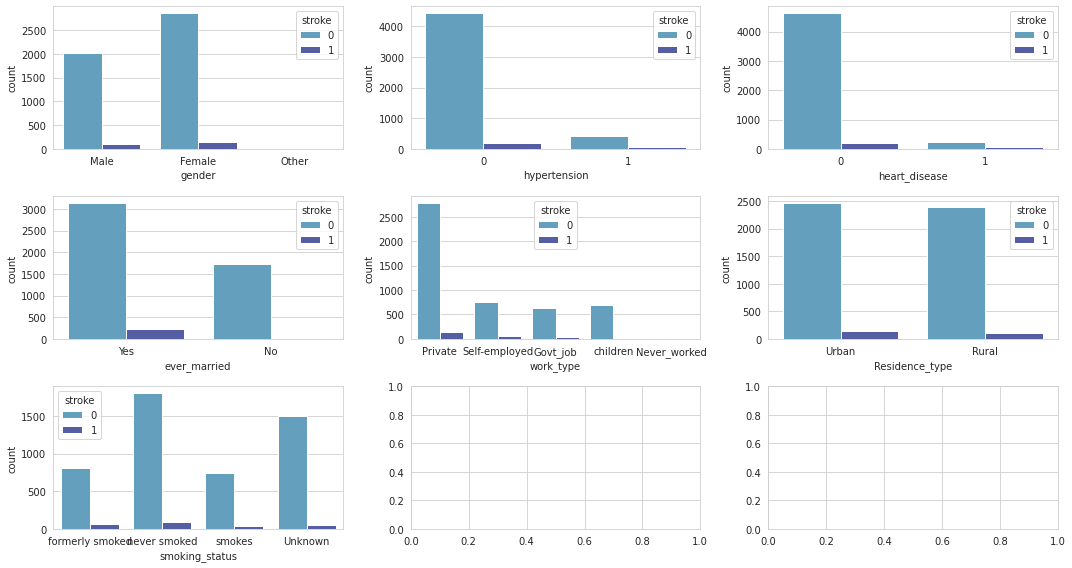

In [ ]:
# plots between categoical features and target
ncols =3
cat_cols =  ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]

fig,ax = plt.subplots(3, 3,figsize=(15, 8))

for idx, feature in enumerate(cat_cols):
    row = idx//ncols
    col = idx% ncols
    sns.countplot(data=df, x=feature, hue='stroke',ax =ax[row,col])

plt.tight_layout()


For getting the correlation
between all features and target, we have to fill Nan values and
encode all categorical columns. Let's do it.

This website explains how to handle missing values

https://medium.com/bycodegarage/a-comprehensive-guide-on-handling-missing-values-b1257a4866d1



In [ ]:

'''
Afaik, both have the same functionality. A bit difference is the idea behind.
OrdinalEncoder is for converting features, while LabelEncoder is for converting target variable.
That's why OrdinalEncoder can fit data that has the shape of (n_samples, n_features) while
LabelEncoder can only fit data that has the shape of (n_samples,)
OrdinalEncoder is for 2D data with the shape (n_samples, n_features)
LabelEncoder is for 1D data with the shape (n_samples,)
Maybe that's why the top-voted answer suggests OrdinalEncoder is for the "features" (often a 2D array),
 whereas LabelEncoder is for the "target variable" (often a 1D array).
'''
from sklearn.preprocessing import OrdinalEncoder

'''
SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset.
'''
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
df['bmi'] = imp.fit_transform(df[["bmi"]])
enc_col =["gender", "work_type",'ever_married',"Residence_type","smoking_status"]
enc = OrdinalEncoder()
df[enc_col] = enc.fit_transform(df[enc_col])

"\nWow, We got some good information here:\n\nAge and Worktype have strong negatinve correlation.\nWorktype and bmi have fairly good negative correlation.\nLet's draw them seperately and see what we get,\n\nFrom the heatmap we can generate following relation between features\n1. With increasing the ag hypertension also increases\n2. the bmi also increases with age, as stroke and smoking-status\n3. the bmi increases with smoking-status\n4. aveg glucose level also a strong connectopn with stroke\n5. Interestingly, increased smoking status, increased bmi. Ever-married with \nincreased smoking status, again age is a factor\n\n"

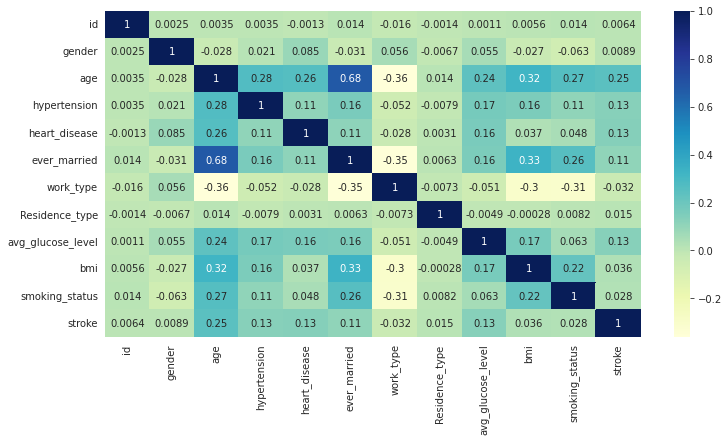

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data = df.corr(),annot=True,
            cmap="YlGnBu",fmt=".2g")

'''
Wow, We got some good information here:

Age and Worktype have strong negatinve correlation.
Worktype and bmi have fairly good negative correlation.
Let's draw them seperately and see what we get,

From the heatmap we can generate following relation between features
1. With increasing the ag hypertension also increases
2. the bmi also increases with age, as stroke and smoking-status
3. the bmi increases with smoking-status
4. aveg glucose level also a strong connectopn with stroke
5. Interestingly, increased smoking status, increased bmi. Ever-married with
increased smoking status, again age is a factor

'''

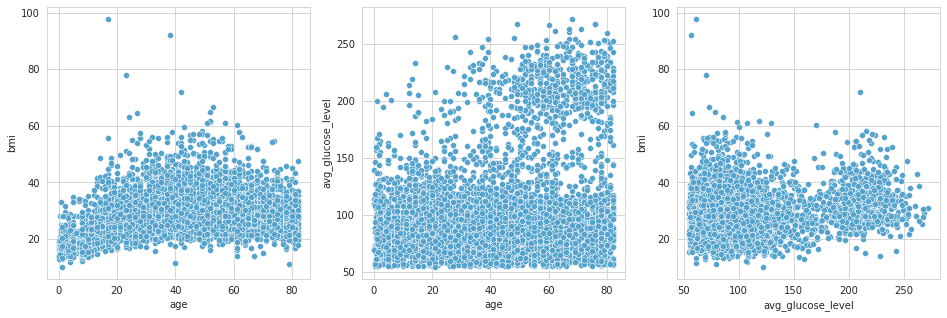

In [ ]:
num_cols = ['age','avg_glucose_level','bmi']
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.scatterplot(data=df, x='age',y='bmi')
plt.subplot(1, 3,2)
sns.scatterplot(data=df, x='age',y='avg_glucose_level')
plt.subplot(1, 3,3)
sns.scatterplot(data=df, x='avg_glucose_level',y='bmi')

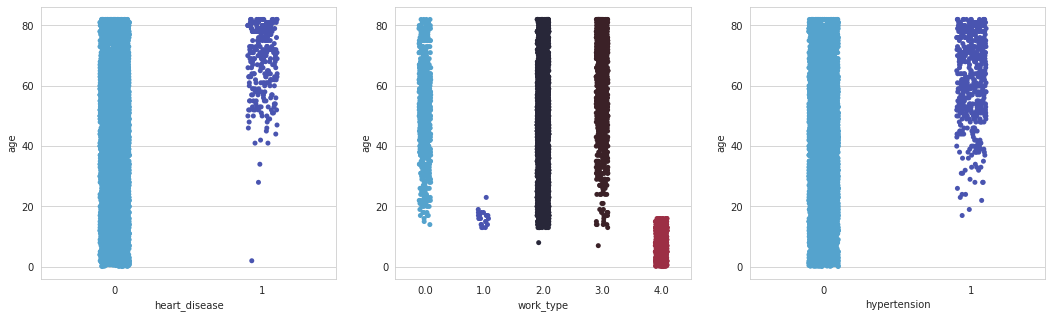

In [ ]:
########## Age Vs. Heart_disease, Work_type, Hypertension ################

plt.figure(figsize=(18, 5))
plt.subplot(1, 3,1)
sns.stripplot(data=df,x='heart_disease',y='age')
plt.subplot(1, 3,2)
sns.stripplot(data=df,x='work_type',y='age')
plt.subplot(1, 3,3)
sns.stripplot(data=df,x='hypertension',y='age')

0    4861
1     249
Name: stroke, dtype: int64


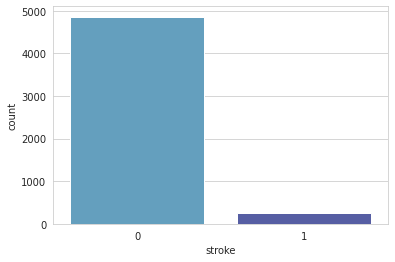

In [ ]:
sns.countplot(data=df, x='stroke');
print(df.stroke.value_counts())

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
1,51676,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.1,2.0,1
2,31112,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,60182,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,1665,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float64
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   float64
 6   work_type          5110 non-null   float64
 7   Residence_type     5110 non-null   float64
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   float64
 11  stroke             5110 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 479.2 KB


In [ ]:
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.862035,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.699562,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
## Now divide X and Y columns

X = df.drop(['stroke'],axis=1)
Y = df['stroke']

In [ ]:
# splitting the data into train and valid dataset

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify=Y, random_state = 3)

# checking the shapes
print("Shape of x_train :", X_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_train :", Y_train.shape)
print("Shape of y_test :", Y_test.shape)

Shape of x_train : (3832, 11)
Shape of x_test : (1278, 11)
Shape of y_train : (3832,)
Shape of y_test : (1278,)


In [ ]:
# Scale the data

from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
X_train_scaled=pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns)
X_train_scaled

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.143826,0.5,0.804688,0.0,0.0,1.0,0.50,0.0,0.100357,0.124857,0.333333
1,0.642323,0.5,0.426270,0.0,0.0,1.0,0.50,1.0,0.423768,0.252005,0.666667
2,0.345148,0.0,0.279785,0.0,0.0,0.0,0.50,1.0,0.213600,0.135166,1.000000
3,0.869773,0.0,0.780273,0.0,0.0,1.0,0.75,0.0,0.342927,0.271478,1.000000
4,0.947182,0.0,0.975586,0.0,1.0,1.0,0.50,0.0,0.214823,0.218786,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
3827,0.783445,0.5,0.682617,0.0,0.0,1.0,0.75,0.0,0.332722,0.163803,0.666667
3828,0.733578,0.0,0.877930,0.0,0.0,1.0,0.50,1.0,0.135299,0.261168,0.333333
3829,0.386426,0.0,0.328613,0.0,0.0,1.0,0.50,1.0,0.077032,0.343643,1.000000
3830,0.812468,0.0,0.401855,0.0,0.0,1.0,0.00,0.0,0.086625,0.301260,1.000000
